In [103]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn import svm
import seaborn as sns

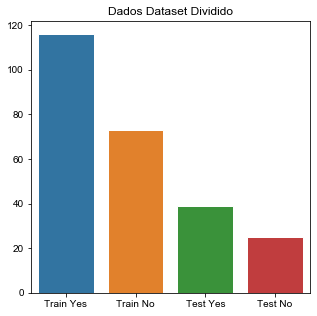

In [2]:
dataset_folder = 'brain_tumor_dataset/'
dataset_dividido_folder = 'brain_tumor_dataset_dividido_v2/'

treino_folder = 'treino/'
teste_folder = 'teste/'

yes = 'yes/'
no = 'no/'

dataset_dividido_folder_treino = dataset_dividido_folder + treino_folder
dataset_dividido_folder_teste = dataset_dividido_folder + teste_folder

dir_train_yes = os.listdir(dataset_dividido_folder_treino + yes)
dir_train_no = os.listdir(dataset_dividido_folder_treino + no)
dir_test_yes = os.listdir(dataset_dividido_folder_teste + yes)
dir_test_no = os.listdir(dataset_dividido_folder_teste + no)
fig_dims = (5, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set_style('whitegrid')
grafico = sns.barplot(ax = ax, x=['Train Yes','Train No','Test Yes','Test No'], y=[len(dir_train_yes),len(dir_train_no),len(dir_test_yes),len(dir_test_no)])
grafico.set_title('Dados Dataset Dividido')
plt.show()

In [66]:
datagen_treino = ImageDataGenerator(rescale = 1./255,
                                    vertical_flip=True,
                                    horizontal_flip=True,
                                    validation_split=0.25) #25% dos 75% iniciais, para validação

datagen_teste = ImageDataGenerator(rescale = 1./255)

In [69]:
seed = 123
dados_treino_size = 142
dados_teste_size = 64

dados_treino = datagen_treino.flow_from_directory(
    dataset_dividido_folder_treino,
    target_size = (150,150),
    color_mode = "grayscale",
    batch_size = dados_treino_size,
    class_mode="binary",
    subset='training',
    seed = seed)

dados_validacao = datagen_treino.flow_from_directory(
    dataset_dividido_folder_treino,
    target_size = (150,150),
    color_mode = "grayscale",
    batch_size = 30,
    class_mode="binary",
    subset='validation',
    seed = seed)

dados_teste = datagen_teste.flow_from_directory(
    dataset_dividido_folder_teste,
    target_size = (150,150),
    color_mode = "grayscale",
    batch_size = dados_teste_size,
    class_mode = 'binary')

print(type(dados_treino))

Found 142 images belonging to 2 classes.
Found 47 images belonging to 2 classes.
Found 64 images belonging to 2 classes.
<class 'keras_preprocessing.image.directory_iterator.DirectoryIterator'>


In [112]:
x_train = []
y_train = []

for inputs_batch, labels_batch in dados_treino:
    for i, img in enumerate(inputs_batch):
        x_train.append(img.reshape(22500))
        y_train.append(labels_batch[i])
    break
    
x_train = np.array(x_train)
y_train = np.array(y_train)

In [116]:
x_test = []
y_test = []

for inputs_batch, labels_batch in dados_treino:
    for i, img in enumerate(inputs_batch):
        x_test.append(img.reshape(22500))
        y_test.append(labels_batch[i])
    break
    
x_test = np.array(x_test)
y_test = np.array(y_test)

In [113]:
def build_model():
    model = svm.SVC(kernel='linear',C=1)
    return model

In [114]:
model = build_model()
history = model.fit(x_train, y_train)

In [117]:
model.score(x_test,y_test)

0.8661971830985915

In [27]:
model.evaluate(dados_teste)

  ...
    to  
  ['...']
3/3 [==============================] - 0s 126ms/step - loss: 0.9945 - accuracy: 0.7344


[0.9945400754610697, 0.734375]

In [28]:
model_best_weights = build_model()
model_best_weights.load_weights('best_weights_simple_dense.hdf5')

model_best_weights.evaluate(dados_teste)

  ...
    to  
  ['...']
3/3 [==============================] - 1s 176ms/step - loss: 0.9608 - accuracy: 0.7031


[0.9607575535774231, 0.703125]

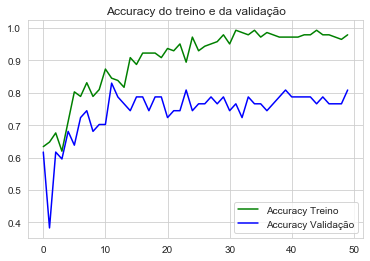

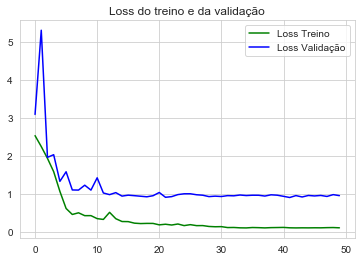

In [29]:
#Visualizar gráficos
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

#Gráfico Accuracy
plt.plot(epochs, accuracy, 'b', color = 'green', label = 'Accuracy Treino')
plt.plot(epochs, val_accuracy, 'b', label = 'Accuracy Validação')
plt.title('Accuracy do treino e da validação')
plt.legend()
plt.figure()

#Gráfico Loss
plt.plot(epochs, loss, 'b', color = 'green', label = 'Loss Treino')
plt.plot(epochs, val_loss, 'b', label = 'Loss Validação')
plt.title('Loss do treino e da validação')
plt.legend()
plt.show()